로지스틱 회귀분석

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer  #유방암 데이터셋

In [168]:
cancer = load_breast_cancer()

데이터 수집 및 탐색

In [169]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [170]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [171]:
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [172]:
raw = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df = raw.copy()

In [173]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [174]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [175]:
df['diagnosis'] = cancer.target

In [176]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [177]:
df.shape # 데이터셋 크기

(569, 31)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

정규화

In [179]:
# 단위, 자리수가 틀림 (0.1~ 1000단위)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 평균 0 , 분산 1 >> 정규분포를 띄게 만들어 줌

In [180]:
scaler.fit_transform(cancer.data)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [181]:
cancer_scaled = scaler.fit_transform(cancer.data)


In [182]:
cancer.data[0] # 원본

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [183]:
cancer_scaled[0] # 스케일링 한 데이터

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

분석 모델 구축: 로지스틱 회귀 >> 이진분류(0,1 )

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [185]:
#독립변수와 종속변수 구분 >> x,y 설정

y = df['diagnosis'] # 종속변수
x = cancer_scaled # 독립변수(예측하기 위한 변수들)

In [186]:
# 훈련용/ 평가용 데이터 분할

x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.3, random_state=42)


In [187]:
#모델 생성
lr = LogisticRegression()

In [188]:
#모델 훈련
lr.fit(x_train, y_train)

LogisticRegression()

In [189]:
#평가 데이터에 대한 예측값  y_pred
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [190]:
y_test # 비교

204    1
70     0
131    0
431    1
540    1
      ..
69     1
542    1
176    1
501    0
247    1
Name: diagnosis, Length: 171, dtype: int64

결과 분석

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [192]:
#혼동행렬(오차행렬)
confusion_matrix(y_test, y_pred)

array([[ 62,   1],
       [  2, 106]])

In [193]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [194]:
print('정확도 : {0: .3f}, 정밀도 : {1: .3f}, 재현율 : {2: .3f}, f1 : {3: .3f}'. format(acc,precision, recall, f1))

정확도 :  0.982, 정밀도 :  0.991, 재현율 :  0.981, f1 :  0.986


In [195]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))


ROC_AUC: 0.983


<h3>의사결정 나무</h3>

In [196]:
# !pip install pandas==0.24.2

텍스트 준비 및 탐색

In [197]:
import numpy as np
import pandas as pd

pd.__version__

'2.0.3'

In [198]:
path = '../../UCI_HAR_Dataset/features.txt'

In [199]:
pd.read_csv(path, sep='\s+', header=None,
            names=['index','feature_name'])

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [200]:
raw = pd.read_csv(path, sep='\s+', header=None,
            names=['index','feature_name'])
df = raw.copy()

In [201]:
df.head(3)

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [202]:
df.shape

(561, 2)

In [203]:
df.iloc[:, 1].values # 행은 전부 열 1에서 값만 가져오기

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
       'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y',
       'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3',
       'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3',
       'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-

In [204]:
# index 제거하고 값을 리스트형식으로
feature_name = df.iloc[:, 1].values.tolist()

In [205]:
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [206]:

path = '../../UCI_HAR_Dataset'

In [207]:
X_train = pd.read_csv(path+'/train/X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv(path+'/test/X_test.txt', sep='\s+', header=None)
Y_train = pd.read_csv(path+'/train/Y_train.txt', sep='\s+', header=None)
Y_test = pd.read_csv(path+'/test/Y_test.txt', sep='\s+', header=None)


In [208]:
X_train.columns = feature_name
X_test.columns = feature_name
Y_train.columns = ['action']
Y_test.columns = ['action']


In [209]:
Y_train.shape

(7352, 1)

In [210]:
Y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

action의 번호별 뜻

In [211]:
label_name = pd.read_csv(path+'/activity_labels.txt', sep='\s+', header=None)
label_name.columns = ['index', 'label']


In [212]:
label_name

,index,label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [213]:
#index 제거, label_name 만 리스트로 저장

label_name = label_name.iloc[:, 1].values.tolist()


In [214]:
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

모델 구축 : 의사결정 나무

In [215]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
#결졍 트리 분류 분석: 모델 생성

dt = DecisionTreeClassifier(random_state=42)

In [217]:
#모델 훈련
dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [218]:
y_pred = dt.predict(X_test)
y_pred

array([5, 5, 5, ..., 2, 1, 2])

결과분석

In [219]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8622


성능 개선 : 최적의 파라미터 찾기

In [220]:
# 모델의 파라미터 (매개변수) 기본값 (default)
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

 정확도를 검사하여 최적의 하이퍼 매개변수를 찾는 작업을 해주는 GridSearchCV 모듈을 사용

In [221]:
from sklearn.model_selection import GridSearchCV

In [222]:
params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt, param_grid = params, scoring='accuracy', cv = 5, return_train_score=True) # cv : cross validation

grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [223]:
grid_cv.cv_results_

{'mean_fit_time': array([2.53275256, 2.86056976, 3.31015701, 3.65906034, 4.87166724,
        4.27159648, 4.50921173]),
 'std_fit_time': array([0.38682651, 0.39674189, 0.32492182, 0.4525478 , 1.00570545,
        0.46931215, 0.78649399]),
 'mean_score_time': array([0.0123692 , 0.01402745, 0.01192079, 0.01161675, 0.01385446,
        0.01254587, 0.01501489]),
 'std_score_time': array([0.0029929 , 0.00333992, 0.00189833, 0.00196286, 0.00236803,
        0.00229847, 0.00198241]),
 'param_max_depth': masked_array(data=[6, 8, 10, 12, 16, 20, 24],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 12},
  {'max_depth': 16},
  {'max_depth': 20},
  {'max_depth': 24}],
 'split0_test_score': array([0.80693406, 0.80557444, 0.78653977, 0.78925901, 0.79673691,
        0.79741672, 0.80897349]),
 'split1_test_score': array([0.86947655, 0.82936778, 0.

In [224]:
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.532753,0.386827,0.012369,0.002993,6,{'max_depth': 6},0.806934,0.869477,0.810204,0.863265,...,0.846303,0.031388,3,0.963272,0.939126,0.945937,0.931826,0.944237,0.944879,0.010424
1,2.860570,0.396742,0.014027,0.003340,8,{'max_depth': 8},0.805574,0.829368,0.848299,0.865306,...,0.847941,0.029357,1,0.985887,0.985377,0.984529,0.977559,0.980109,0.982692,0.003281
2,3.310157,0.324922,0.011921,0.001898,10,{'max_depth': 10},0.786540,0.805574,0.840136,0.882993,...,0.840464,0.040265,7,0.992348,0.995919,0.994560,0.992690,0.991499,0.993403,0.001607
3,3.659060,0.452548,0.011617,0.001963,12,{'max_depth': 12},0.789259,0.818491,0.844898,0.878231,...,0.843319,0.036215,6,0.995579,0.998640,0.997620,0.997790,0.996260,0.997178,0.001105
4,4.871667,1.005705,0.013854,0.002368,16,{'max_depth': 16},0.796737,0.819850,0.844218,0.884354,...,0.845358,0.034212,4,0.998980,1.000000,0.999830,0.999660,0.999830,0.999660,0.000357
5,4.271596,0.469312,0.012546,0.002298,20,{'max_depth': 20},0.797417,0.819850,0.848299,0.878231,...,0.845086,0.032722,5,0.999830,1.000000,1.000000,1.000000,1.000000,0.999966,0.000068
6,4.509212,0.786494,0.015015,0.001982,24,{'max_depth': 24},0.808973,0.819850,0.848299,0.878231,...,0.847397,0.029526,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [225]:
result_df[['param_max_depth','mean_test_score','mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.846303,0.944879
1,8,0.847941,0.982692
2,10,0.840464,0.993403
3,12,0.843319,0.997178
4,16,0.845358,0.999660
5,20,0.845086,0.999966
6,24,0.847397,1.000000


In [226]:
print('최고 평균 정확도 : {0:.3f}'.format(grid_cv.best_score_))
print('최적 파라미터 : ', grid_cv.best_params_)

최고 평균 정확도 : 0.848
최적 파라미터 :  {'max_depth': 8}


In [227]:
params = {
    'max_depth' : [6,8,10],
    'min_samples_split' : [8,12,16]

}

grid_cv = GridSearchCV(dt, param_grid = params, scoring='accuracy', cv = 5, return_train_score=True) # cv : cross validation

grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [8, 12, 16]},
             return_train_score=True, scoring='accuracy')

In [228]:
grid_cv.cv_results_

{'mean_fit_time': array([2.38138456, 2.21388793, 2.2461462 , 2.87825446, 2.85650034,
        2.90388942, 3.34987488, 3.36600871, 3.42819023]),
 'std_fit_time': array([0.26778631, 0.22515172, 0.30645135, 0.425763  , 0.36602675,
        0.33052691, 0.44939595, 0.37136319, 0.59037145]),
 'mean_score_time': array([0.01501732, 0.01217918, 0.01208634, 0.01386476, 0.01374784,
        0.01407614, 0.01348119, 0.01334872, 0.01270819]),
 'std_score_time': array([0.00310847, 0.00197358, 0.00273854, 0.0035723 , 0.00405377,
        0.00274226, 0.00298818, 0.0023215 , 0.00309661]),
 'param_max_depth': masked_array(data=[6, 6, 6, 8, 8, 8, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[8, 12, 16, 8, 12, 16, 8, 12, 16],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [229]:
result_df = pd.DataFrame(grid_cv.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.381385,0.267786,0.015017,0.003108,6,8,"{'max_depth': 6, 'min_samples_split': 8}",0.806934,0.869477,0.809524,...,0.846303,0.031620,7,0.962931,0.939126,0.945767,0.931656,0.943897,0.944675,0.010348
1,2.213888,0.225152,0.012179,0.001974,6,12,"{'max_depth': 6, 'min_samples_split': 12}",0.806934,0.869477,0.809524,...,0.846303,0.031620,7,0.962931,0.939126,0.945767,0.931656,0.943897,0.944675,0.010348
2,2.246146,0.306451,0.012086,0.002739,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.806934,0.870836,0.809524,...,0.844398,0.029620,9,0.962421,0.938616,0.945767,0.930976,0.943387,0.944233,0.010404
3,2.878254,0.425763,0.013865,0.003572,8,8,"{'max_depth': 8, 'min_samples_split': 8}",0.808294,0.822570,0.850340,...,0.851615,0.034070,2,0.984867,0.984356,0.983169,0.976369,0.978579,0.981468,0.003380
4,2.856500,0.366027,0.013748,0.004054,8,12,"{'max_depth': 8, 'min_samples_split': 12}",0.811013,0.830727,0.859184,...,0.855559,0.032081,1,0.984696,0.983846,0.982149,0.975689,0.978579,0.980992,0.003381
5,2.903889,0.330527,0.014076,0.002742,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.802855,0.830727,0.858503,...,0.849710,0.030091,4,0.982996,0.981806,0.981809,0.974498,0.978069,0.979836,0.003142
6,3.349875,0.449396,0.013481,0.002988,10,8,"{'max_depth': 10, 'min_samples_split': 8}",0.801496,0.813732,0.850340,...,0.848488,0.036373,5,0.990818,0.993879,0.990989,0.989969,0.987929,0.990717,0.001919
7,3.366009,0.371363,0.013349,0.002322,10,12,"{'max_depth': 10, 'min_samples_split': 12}",0.800816,0.817131,0.850340,...,0.848351,0.035187,6,0.990648,0.991498,0.989969,0.987929,0.986059,0.989221,0.001972
8,3.428190,0.590371,0.012708,0.003097,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.806934,0.821890,0.855782,...,0.850663,0.031741,3,0.988607,0.988947,0.988439,0.986569,0.984359,0.987384,0.001724


In [230]:
result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [231]:
selected_features = ['param_max_depth','param_min_samples_split', 'mean_test_score','mean_train_score' ]
result_df[selected_features]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,6,8,0.846303,0.944675
1,6,12,0.846303,0.944675
2,6,16,0.844398,0.944233
3,8,8,0.851615,0.981468
4,8,12,0.855559,0.980992
5,8,16,0.849710,0.979836
6,10,8,0.848488,0.990717
7,10,12,0.848351,0.989221
8,10,16,0.850663,0.987384


In [232]:
print('최고 평균 정확도 : {0:.3f}'.format(grid_cv.best_score_))
print('최적 파라미터 : ', grid_cv.best_params_)

최고 평균 정확도 : 0.856
최적 파라미터 :  {'max_depth': 8, 'min_samples_split': 12}


In [233]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=12, random_state=42)

In [234]:
best_dt = grid_cv.best_estimator_


In [235]:
best_pred = best_dt.predict(X_test)
best_pred

array([5, 5, 5, ..., 2, 1, 2])

In [236]:
accuracy = accuracy_score(Y_test, best_pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


중요 속성(important feature)확인

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt



In [238]:
best_dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00217713,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00670169, 0.        , 0.        ,
       0.        , 0.00403165, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0012275 ,
       0.00628252, 0.        , 0.25304002, 0.00207442, 0.00622909,
       0.        , 0.        , 0.01641304, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00474523, 0.        , 0.        ,
       0.        , 0.00302079, 0.        , 0.        , 0.10142

In [239]:
feature_importance = best_dt.feature_importances_


In [240]:
feature_importance = pd.Series(feature_importance, index=X_train.columns)

In [241]:
feature_importance

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.000000
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001289
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000988
angle(Y,gravityMean)                    0.138828
angle(Z,gravityMean)                    0.000000
Length: 561, dtype: float64

In [242]:
feature_importance_top10 = feature_importance.sort_values(ascending=False)[:10]

In [243]:
feature_importance_top10

tGravityAcc-min()-X                0.253040
fBodyAccJerk-bandsEnergy()-1,16    0.212320
angle(Y,gravityMean)               0.138828
fBodyAccMag-energy()               0.115335
tGravityAcc-arCoeff()-Z,2          0.101422
fBodyGyro-maxInds-X                0.023941
tBodyGyro-correlation()-Y,Z        0.016493
tGravityAcc-energy()-Y             0.016413
tBodyAccMag-arCoeff()1             0.012596
fBodyAcc-max()-Y                   0.008814
dtype: float64

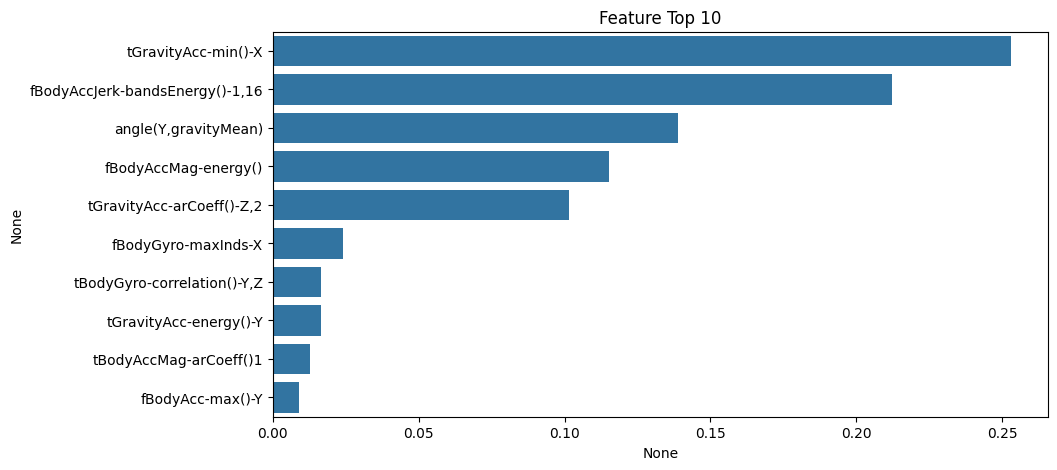

In [244]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_importance_top10, y = feature_importance_top10.index)
plt.show()

In [244]:
# !pip install graphviz

In [244]:
from sklearn.tree import export_graphviz

export_graphviz(best_dt, out_file='best_tree.dot', class_names = label_name, 
                feature_names = feature_name,filled=True)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성


In [ ]:
import graphviz

with open('best_tree.dot') as file:
    dot_tree = file.read()

# Graphviz Source 객체 생성 및 사이즈 조정
graph = graphviz.Source(dot_tree)
graph